# Seattle Airbnb Data

The aim is to examine the Seattle Airbnb data and derive insights on what factors impact Airbnb listing prices. We explore 3 main questions:
- Do missing descriptions impact prices?
- How does ease of booking impact prices? ( cancellation policy, instant bookability, requiremrents for booking, etc.)
- How do reviews immpact prices? (number of reviews, scores, etc.)


### Install libraries

In [5]:
pip install -U scikit-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 0 ns (started: 2025-04-18 09:04:35 +01:00)


### Read in data (3 csvs)

In [2]:
#Read in calendar csv

calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


time: 1.64 s (started: 2025-04-18 09:04:35 +01:00)


In [3]:
#Read in listings csv

listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


time: 563 ms (started: 2025-04-18 09:04:36 +01:00)


In [4]:
#Read in reviews csv

reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


time: 796 ms (started: 2025-04-18 09:04:37 +01:00)


### Exploratory analysis 

In [7]:
# Get number of rows of data (calendar)
calendar.shape[0]

1393570

time: 15 ms (started: 2025-04-11 11:24:13 +01:00)


In [8]:
# Get number of rows of data (listings)
listings.shape[0]

3818

time: 0 ns (started: 2025-04-11 11:24:14 +01:00)


In [6]:
# Get number of rows of data (reviews)
reviews.shape[0]

84849

time: 0 ns (started: 2025-04-11 11:23:49 +01:00)


In [88]:
# What are the columns in listings
list(listings)

['listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_

time: 15 ms (started: 2025-04-11 13:21:40 +01:00)


In [93]:
# Explore some of these fields
listings['neighbourhood']

0        Queen Anne
1        Queen Anne
2        Queen Anne
3        Queen Anne
4        Queen Anne
           ...     
3813        Fremont
3814    Portage Bay
3815            NaN
3816            NaN
3817     Queen Anne
Name: neighbourhood, Length: 3818, dtype: object

time: 16 ms (started: 2025-04-11 13:23:41 +01:00)


In [9]:
# What is the timeframe for this data (max/min dates in calendar)

print(calendar['date'].max())
print(calendar['date'].min())

# Jan 2016 - Jan 2017

2017-01-02
2016-01-04
time: 188 ms (started: 2025-04-11 11:24:31 +01:00)


In [10]:
# How many listings are there in total?
# calendar['listing_id'].count()
print(str(calendar['listing_id'].agg('nunique')) + ' listings in calendar')
print(str(listings['id'].agg('nunique')) + ' listings in listings')
print(str(reviews['listing_id'].agg('nunique')) + ' listings in reviews')

# 3,818 listings

3818 listings in calendar
3818 listings in listings
3191 listings in reviews
time: 63 ms (started: 2025-04-11 11:25:12 +01:00)


In [11]:
# Is the min/max date the same for all listings? Or does it show the dates for when it came to market?
minmaxdate = calendar.groupby('listing_id').agg(max_date = ('date','max'), min_date = ('date','min'))
minmaxdate.head()

,max_date,min_date
listing_id,,
3335,2017-01-02,2016-01-04
4291,2017-01-02,2016-01-04
5682,2017-01-02,2016-01-04
6606,2017-01-02,2016-01-04
7369,2017-01-02,2016-01-04


time: 1.28 s (started: 2025-04-11 11:25:29 +01:00)


In [20]:
#what is the type of the price column
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

time: 0 ns (started: 2025-04-11 11:38:48 +01:00)


In [5]:
#convert price to numeric 
#remove dollar sign first
calendar['price_avg'] = pd.to_numeric(calendar['price'].str.replace('$', ''), errors='coerce')
calendar.dtypes

<ipython-input-5-c8cca261781f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  calendar['price_avg'] = pd.to_numeric(calendar['price'].str.replace('$', ''), errors='coerce')


listing_id      int64
date           object
available      object
price          object
price_avg     float64
dtype: object

time: 1.59 s (started: 2025-04-18 09:04:43 +01:00)


In [6]:
# Get average price for each listing
listing_price = calendar.groupby('listing_id')['price_avg'].mean()
listing_price.head()

listing_id
3335    120.000000
4291     82.000000
5682     53.944984
6606     92.849315
7369     85.000000
Name: price_avg, dtype: float64

time: 109 ms (started: 2025-04-18 09:04:45 +01:00)


In [7]:
#check no duplication
print(str(calendar['listing_id'].agg('nunique')) + ' listings in calendar')
print(listing_price.shape[0])

3818 listings in calendar
3818
time: 63 ms (started: 2025-04-18 09:04:45 +01:00)


In [8]:
# Join average listing price to listing df

# rename columns to match
listings = listings.rename(columns={"id": "listing_id"})

# join with price data
listings2 = listings.join(listing_price, on='listing_id', how='left')
listings2.shape[0]

3818

time: 47 ms (started: 2025-04-18 09:04:47 +01:00)


In [9]:
listings2.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_avg
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,894.186047
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726


time: 47 ms (started: 2025-04-18 09:04:48 +01:00)


### 1) Do missing descriptions impact prices?

In [80]:
# create function for creating NA flags

def na_flag(df, col):
    df[(col + '_NA')] = np.where(df[col].isna(), 0, 1)
    print(df.groupby((col + '_NA'))['price_avg'].mean())
    print(df.groupby((col + '_NA'))['listing_id'].count())

time: 0 ns (started: 2025-04-11 13:10:43 +01:00)


In [81]:
na_flag(listings2, 'summary')

summary_NA
0    136.156921
1    135.341474
Name: price_avg, dtype: float64
summary_NA
0     177
1    3641
Name: listing_id, dtype: int64
time: 0 ns (started: 2025-04-11 13:10:45 +01:00)


In [82]:
na_flag(listings2, 'neighborhood_overview')

neighborhood_overview_NA
0    138.747845
1    134.136001
Name: price_avg, dtype: float64
neighborhood_overview_NA
0    1032
1    2786
Name: listing_id, dtype: int64
time: 16 ms (started: 2025-04-11 13:11:04 +01:00)


In [83]:
na_flag(listings2, 'space')

space_NA
0    129.993938
1    136.321921
Name: price_avg, dtype: float64
space_NA
0     569
1    3249
Name: listing_id, dtype: int64
time: 0 ns (started: 2025-04-11 13:11:12 +01:00)


In [84]:
na_flag(listings2, 'description')

description_NA
1    135.380034
Name: price_avg, dtype: float64
description_NA
1    3818
Name: listing_id, dtype: int64
time: 0 ns (started: 2025-04-11 13:11:29 +01:00)


Having more information listed (eg. description, summary, etc.) does not necessarily lead to higher prices. The only field that may have an impace is 'space'.

In [75]:
# Does the amount of missing info relate to lower prices? Eg. if a listing has no description on 1 vs 2 vs 3 fields

listings2['count_NA'] = listings2['summary_NA'] + listings2['neighborhood_overview_NA'] + listings2['space_NA'] 
listings2.groupby(['count_NA'])['price_avg'].mean()

count_NA
1    132.952066
2    141.334069
3    134.621072
Name: price_avg, dtype: float64

time: 16 ms (started: 2025-04-11 13:08:15 +01:00)


In [77]:
listings2.groupby(['count_NA'])['listing_id'].count()

count_NA
1     597
2     584
3    2637
Name: listing_id, dtype: int64

time: 0 ns (started: 2025-04-11 13:09:17 +01:00)


Doesn't seem to be a pattern with the number of missing/non-missing info

In [86]:
listings2.groupby(['count_NA', 'space_NA'])['price_avg'].mean()

count_NA  space_NA
1         0           131.020785
          1           139.565242
2         0           125.443594
          1           144.827233
3         1           134.621072
Name: price_avg, dtype: float64

time: 16 ms (started: 2025-04-11 13:14:11 +01:00)


In [85]:
listings2.groupby(['count_NA', 'space_NA'])['listing_id'].count()

count_NA  space_NA
1         0            464
          1            133
2         0            105
          1            479
3         1           2637
Name: listing_id, dtype: int64

time: 15 ms (started: 2025-04-11 13:13:46 +01:00)


'Space' description seems to have an impact

In [10]:
# what about listing completeness as a whole?

# create NA flags then counting how many missings there are in total
# loop through all the columns in the listings df

col_list = list(listings)
listings_NA = pd.DataFrame(data = listings['listing_id'])

for col in col_list:
    listings_NA[col+'_NA'] = np.where(listings[col].isna(), 0, 1)



time: 141 ms (started: 2025-04-18 09:04:58 +01:00)


In [11]:
# count how many are NA
col_list_NA = list(listings_NA)
col_list_NA.remove('listing_id')

listings_NA['count_NA'] = listings_NA[col_list_NA].sum(axis=1)
listings_NA.head()

,listing_id,listing_id_NA,listing_url_NA,scrape_id_NA,last_scraped_NA,name_NA,summary_NA,space_NA,description_NA,experiences_offered_NA,...,requires_license_NA,license_NA,jurisdiction_names_NA,instant_bookable_NA,cancellation_policy_NA,require_guest_profile_picture_NA,require_guest_phone_verification_NA,calculated_host_listings_count_NA,reviews_per_month_NA,count_NA
0,241032,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,1,79
1,953595,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,90
2,3308979,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,85
3,7421966,1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,1,1,1,0,67
4,278830,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,84


time: 578 ms (started: 2025-04-18 09:04:59 +01:00)


In [12]:
listings2.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_avg
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,894.186047
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726


time: 62 ms (started: 2025-04-13 09:51:46 +01:00)


In [131]:
listings2.shape[0]

3818

time: 0 ns (started: 2025-04-11 14:02:13 +01:00)


In [134]:
# are any of these missing price_avg?
listings2['price_avg'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3813    False
3814    False
3815    False
3816    False
3817    False
Name: price_avg, Length: 3818, dtype: bool

time: 16 ms (started: 2025-04-11 14:03:14 +01:00)


In [12]:
listings_NA.shape[0]

3818

time: 0 ns (started: 2025-04-13 10:26:18 +01:00)


In [14]:
# how does this relate to prices?

# join prices data onto listings_NA
listings3 = pd.merge(listings2, listings_NA, on='listing_id', how='left')
listings3.head()


,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license_NA,license_NA,jurisdiction_names_NA,instant_bookable_NA,cancellation_policy_NA,require_guest_profile_picture_NA,require_guest_phone_verification_NA,calculated_host_listings_count_NA,reviews_per_month_NA,count_NA
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,1,0,1,1,1,1,1,1,1,79
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,1,0,1,1,1,1,1,1,1,90
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,1,0,1,1,1,1,1,1,1,85
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,1,0,1,1,1,1,1,1,0,67
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,1,0,1,1,1,1,1,1,1,84


time: 62 ms (started: 2025-04-18 09:05:30 +01:00)


In [15]:
list(listings3)

['listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_

time: 16 ms (started: 2025-04-18 09:05:32 +01:00)


In [18]:
pd.DataFrame(listings3.groupby('count_NA', as_index = False)['number_of_reviews'].mean())

,count_NA,number_of_reviews
0,59,0.000000
1,63,0.000000
2,65,0.000000
3,66,0.000000
4,67,0.000000
5,68,0.026316
6,69,0.000000
7,70,0.026316
8,71,0.000000
9,72,0.018868


time: 0 ns (started: 2025-04-18 09:06:30 +01:00)


In [21]:
# Get dataframe grouped by count_NA and the average price and number of reviews for each group
# higher values of count_NA = more completeness of data

NA_price = pd.merge(
    pd.DataFrame(listings3.groupby('count_NA', as_index = False)['price_avg'].mean()),
    pd.DataFrame(listings3.groupby('count_NA', as_index = False)['number_of_reviews'].mean()),
    on='count_NA',
    how='left'
    )


NA_price = pd.merge(
    NA_price,
    pd.DataFrame(listings3.groupby('count_NA', as_index = False)['listing_id'].count()),
    on='count_NA',
    how='left'
    )

# rename
NA_price = NA_price.rename(columns = {'listing_id': 'n'})

NA_price.head()

,count_NA,price_avg,number_of_reviews,n
0,59,250.000000,0.0,1
1,63,100.264045,0.0,2
2,65,131.666667,0.0,3
3,66,138.625000,0.0,8
4,67,106.100000,0.0,10


time: 31 ms (started: 2025-04-18 09:24:59 +01:00)


In [39]:
NA_price.dtypes

count_NA       int64
price_avg    float64
n              int64
dtype: object

time: 0 ns (started: 2025-04-11 14:36:00 +01:00)


In [22]:
# whats the correlation? (Pearson)
NA_price.corr()

,count_NA,price_avg,number_of_reviews,n
count_NA,1.000000,-0.239983,0.853737,0.716241
price_avg,-0.239983,1.000000,-0.197426,-0.093783
number_of_reviews,0.853737,-0.197426,1.000000,0.746378
n,0.716241,-0.093783,0.746378,1.000000


time: 32 ms (started: 2025-04-18 09:25:11 +01:00)


In [23]:
listings3[['count_NA', 'price_avg', 'number_of_reviews']].corr()

,count_NA,price_avg,number_of_reviews
count_NA,1.000000,-0.028936,0.283238
price_avg,-0.028936,1.000000,-0.110144
number_of_reviews,0.283238,-0.110144,1.000000


time: 15 ms (started: 2025-04-18 09:25:46 +01:00)


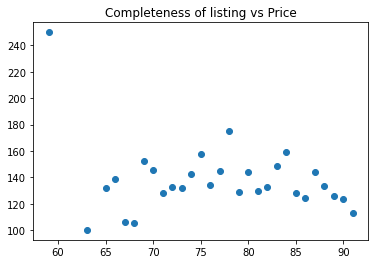

time: 203 ms (started: 2025-04-11 14:37:26 +01:00)


In [45]:
# graph price
plt.scatter(NA_price['count_NA'], NA_price['price_avg'])
plt.title("Completeness of listing vs Price")
plt.show()

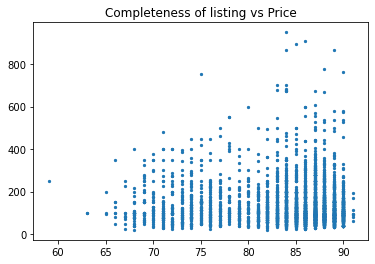

time: 484 ms (started: 2025-04-18 09:26:14 +01:00)


In [24]:
# graph number of reviews
plt.scatter(listings3['count_NA'], listings3['price_avg'], s=5)
plt.title("Completeness of listing vs Price")
plt.show()

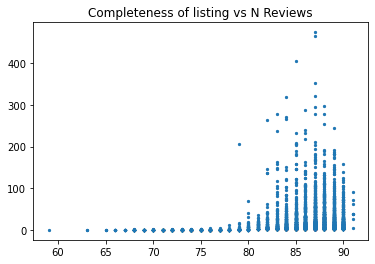

time: 156 ms (started: 2025-04-18 09:26:18 +01:00)


In [25]:
# graph number of reviews
plt.scatter(listings3['count_NA'], listings3['number_of_reviews'], s=5)
plt.title("Completeness of listing vs N Reviews")
plt.show()

There seems to be no correlation between completeness of listing vs price. 

But what if we removed cases where n is low? 

In [52]:
# what is the range of n like?
print(NA_price['n'].min())
print(NA_price['n'].quantile(q=0.25))
print(NA_price['n'].mean())
print(NA_price['n'].quantile(q=0.75))
print(NA_price['n'].max())

1
38.0
131.6551724137931
168.0
564
time: 0 ns (started: 2025-04-11 14:42:06 +01:00)


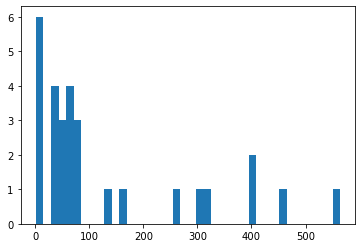

time: 250 ms (started: 2025-04-11 15:03:25 +01:00)


In [58]:
# graph this to determine our cutoff points
plt.hist(NA_price['n'], bins=40)
plt.show()

In [60]:
NA_price.loc[NA_price['n']<50]

,count_NA,price_avg,n
0,59,250.000000,1
1,63,100.264045,2
2,65,131.666667,3
3,66,138.625000,8
4,67,106.100000,10
5,68,105.445109,38
6,69,152.670695,34
7,70,145.984048,38
15,78,175.364147,41
28,91,113.022749,8


time: 31 ms (started: 2025-04-11 15:05:31 +01:00)


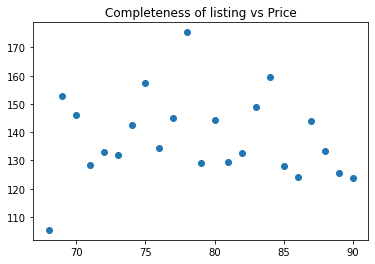

time: 188 ms (started: 2025-04-11 15:08:36 +01:00)


In [68]:
# subset to n>30 and replot
NA_price_50plus = NA_price.loc[NA_price['n']>30]

plt.scatter(NA_price_50plus['count_NA'], NA_price_50plus['price_avg'])
plt.title("Completeness of listing vs Price")
plt.show()

In [69]:
NA_price_50plus.corr()

,count_NA,price_avg,n
count_NA,1.000000,-0.071919,0.823932
price_avg,-0.071919,1.000000,-0.173676
n,0.823932,-0.173676,1.000000


time: 0 ns (started: 2025-04-11 15:08:59 +01:00)


Still very weak correlation despite removing lower cases of n

Repeat but try using only some columns which customers may care about if information is missing - classify these subsets

In [26]:
# create groupings of diff vars which reflect aspects customers may care about
# 6 groups in total: description, images, hostinfo, reviewinfo, locationinfo, propertyinfo

col_list_description = ['summary_NA', 'space_NA', 'neighborhood_overview_NA', 'notes_NA', 'transit_NA']
col_list_images = ['thumbnail_url_NA', 'picture_url_NA', 'xl_picture_url_NA']
col_list_hostinfo = ['host_id_NA',
 'host_url_NA',
 'host_name_NA',
 'host_since_NA',
 'host_location_NA',
 'host_about_NA',
 'host_response_time_NA',
 'host_response_rate_NA',
 'host_acceptance_rate_NA',
 'host_is_superhost_NA',
 'host_thumbnail_url_NA',
 'host_picture_url_NA',
 'host_neighbourhood_NA',
 'host_listings_count_NA',
 'host_total_listings_count_NA',
 'host_verifications_NA',
 'host_has_profile_pic_NA',
 'host_identity_verified_NA']
col_list_reviewinfo = [ 'first_review_NA',
 'last_review_NA',
 'review_scores_rating_NA',
 'review_scores_accuracy_NA',
 'review_scores_cleanliness_NA',
 'review_scores_checkin_NA',
 'review_scores_communication_NA',
 'review_scores_location_NA',
 'review_scores_value_NA']
col_list_locationinfo = ['neighbourhood_group_cleansed_NA',
 'city_NA',
 'state_NA',
 'zipcode_NA',
 'latitude_NA',
 'longitude_NA',
 'is_location_exact_NA',
 'street_NA']
col_list_propertyinfo = ['property_type_NA',
 'room_type_NA',
 'accommodates_NA',
 'bathrooms_NA',
 'bedrooms_NA',
 'beds_NA',
 'bed_type_NA',
 'amenities_NA',
 'square_feet_NA']


time: 0 ns (started: 2025-04-18 09:26:36 +01:00)


In [27]:
listings_NA_grp = pd.DataFrame(listings_NA['listing_id'])
listings_NA_grp.head()

,listing_id
0,241032
1,953595
2,3308979
3,7421966
4,278830


time: 0 ns (started: 2025-04-18 09:26:41 +01:00)


In [28]:
col_list_category = [col_list_description, col_list_images, col_list_hostinfo, col_list_reviewinfo, col_list_locationinfo, col_list_propertyinfo]
category_names = ['description', 'images', 'hostinfo', 'reviewinfo', 'locationinfo', 'propertyinfo']

time: 0 ns (started: 2025-04-18 09:26:48 +01:00)


In [29]:
## try again but hardcode the names
def create_NA_group(list_category_NA, category_NA_name):
    col_list_NA = listings_NA[list_category_NA]
    listings_NA_grp['count_NA_'+ category_NA_name] = col_list_NA.sum(axis=1)
    
    return listings_NA_grp

time: 0 ns (started: 2025-04-18 09:26:49 +01:00)


In [30]:
for x in range(len(col_list_category)):
#     print(x)
    create_NA_group(col_list_category[x], category_names[x])

time: 15 ms (started: 2025-04-18 09:26:52 +01:00)


In [31]:
listings_NA_grp.head()

,listing_id,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,1,1,18,9,8,8
1,953595,5,3,18,9,8,8
2,3308979,5,1,18,9,8,8
3,7421966,1,1,14,0,8,8
4,278830,5,1,17,9,8,8


time: 0 ns (started: 2025-04-18 09:26:53 +01:00)


In [32]:
# merge back onto price to get mean prices
listings_NA_grp_price = pd.merge(listings2[['listing_id', 'price_avg', 'number_of_reviews']], listings_NA_grp, on='listing_id', how='left')
listings_NA_grp_price.head()

# NA_grp_price = pd.merge(
#     pd.DataFrame(listings3.groupby('count_NA', as_index = False)['price_avg'].mean()),
#     pd.DataFrame(listings3.groupby('count_NA', as_index = False)['listing_id'].count()),
#     on='count_NA',
#     how='left'
#     )

# # rename
# NA_price = NA_price.rename(columns = {'listing_id': 'n'})

# # higher values of count_NA = more completeness of data

# NA_price.head()

,listing_id,price_avg,number_of_reviews,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,207,1,1,18,9,8,8
1,953595,170.931271,43,5,3,18,9,8,8
2,3308979,894.186047,20,5,1,18,9,8,8
3,7421966,100.000000,0,1,1,14,0,8,8
4,278830,462.739726,38,5,1,17,9,8,8


time: 31 ms (started: 2025-04-18 09:26:59 +01:00)


In [33]:
# whats the correlation? (Pearson)
listings_NA_grp_price.corr()

,listing_id,price_avg,number_of_reviews,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
listing_id,1.000000,-0.058661,-0.506105,-0.084761,0.007482,-0.195049,-0.402526,0.019492,-0.167868
price_avg,-0.058661,1.000000,-0.110144,-0.031625,-0.169208,-0.044693,-0.008493,-0.014371,0.036156
number_of_reviews,-0.506105,-0.110144,1.000000,0.108718,0.051698,0.244004,0.267432,-0.009159,0.069052
count_NA_description,-0.084761,-0.031625,0.108718,1.000000,0.041119,0.202413,0.253918,0.004573,0.029641
count_NA_images,0.007482,-0.169208,0.051698,0.041119,1.000000,0.027798,0.019751,0.031226,-0.004789
count_NA_hostinfo,-0.195049,-0.044693,0.244004,0.202413,0.027798,1.000000,0.342083,0.026568,0.019546
count_NA_reviewinfo,-0.402526,-0.008493,0.267432,0.253918,0.019751,0.342083,1.000000,-0.003085,0.050410
count_NA_locationinfo,0.019492,-0.014371,-0.009159,0.004573,0.031226,0.026568,-0.003085,1.000000,-0.030476
count_NA_propertyinfo,-0.167868,0.036156,0.069052,0.029641,-0.004789,0.019546,0.050410,-0.030476,1.000000


time: 31 ms (started: 2025-04-18 09:27:05 +01:00)


<AxesSubplot:xlabel='price_avg', ylabel='number_of_reviews'>

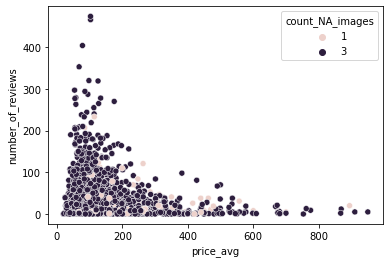

time: 407 ms (started: 2025-04-14 18:11:35 +01:00)


In [46]:
sns.scatterplot(data=listings_NA_grp_price, x="price_avg", y="number_of_reviews", hue="count_NA_images")

<AxesSubplot:xlabel='price_avg', ylabel='number_of_reviews'>

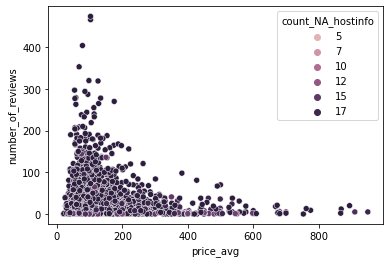

time: 672 ms (started: 2025-04-14 18:12:35 +01:00)


In [47]:
sns.scatterplot(data=listings_NA_grp_price, x="price_avg", y="number_of_reviews", hue="count_NA_hostinfo")

<AxesSubplot:xlabel='count_NA_description', ylabel='number_of_reviews'>

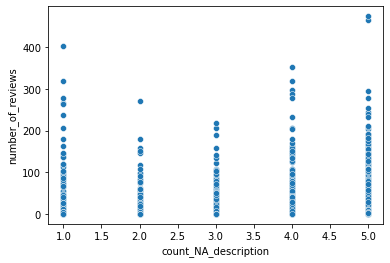

time: 219 ms (started: 2025-04-14 18:25:58 +01:00)


In [52]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_description", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_images', ylabel='number_of_reviews'>

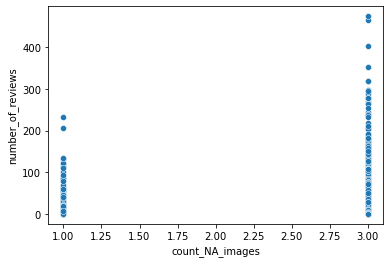

time: 203 ms (started: 2025-04-14 18:23:00 +01:00)


In [49]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_images", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_hostinfo', ylabel='number_of_reviews'>

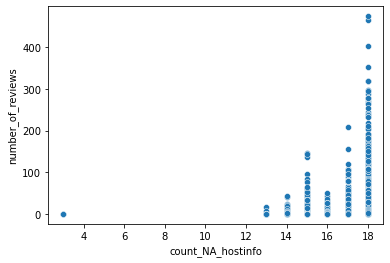

time: 204 ms (started: 2025-04-14 18:13:53 +01:00)


In [48]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_hostinfo", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_reviewinfo', ylabel='number_of_reviews'>

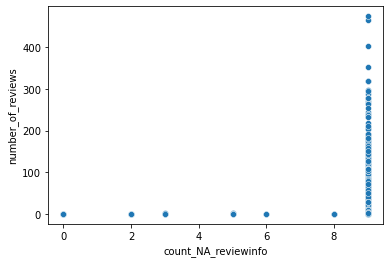

time: 172 ms (started: 2025-04-14 18:27:12 +01:00)


In [53]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_reviewinfo", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_locationinfo', ylabel='number_of_reviews'>

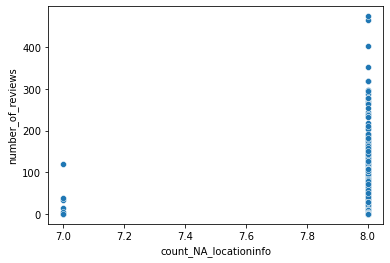

time: 172 ms (started: 2025-04-14 18:27:14 +01:00)


In [54]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_locationinfo", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_propertyinfo', ylabel='number_of_reviews'>

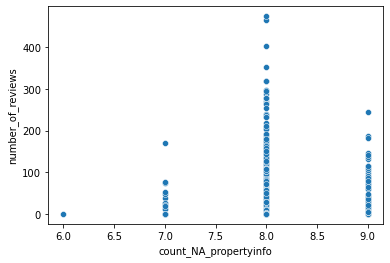

time: 188 ms (started: 2025-04-14 18:27:16 +01:00)


In [55]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_propertyinfo", y="number_of_reviews")

In [36]:
listings_NA_grp_price.head()

,listing_id,price_avg,number_of_reviews,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,207,1,1,18,9,8,8
1,953595,170.931271,43,5,3,18,9,8,8
2,3308979,894.186047,20,5,1,18,9,8,8
3,7421966,100.000000,0,1,1,14,0,8,8
4,278830,462.739726,38,5,1,17,9,8,8


time: 0 ns (started: 2025-04-18 09:38:23 +01:00)


In [34]:
from sklearn import linear_model

time: 547 ms (started: 2025-04-18 09:27:50 +01:00)


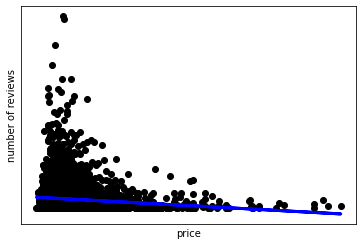

time: 109 ms (started: 2025-04-18 09:46:56 +01:00)


In [49]:
listings_NA_grp_price.dropna(inplace = True) 

# if listings had the same characteristics, how much does completeness of info impact price/number of reviews?
X = listings_NA_grp_price[['price_avg']]
y = listings_NA_grp_price[['number_of_reviews']]

# X = X.reshape(length, 1)
# y = y.reshape(length, 1)

regr = sk.linear_model.LinearRegression()
regr.fit(X, y)

# print(regr.score(X,y))

plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.show()

In [52]:
# Get r-squared for linear regression price against number of reviews

# if listings had the same characteristics, how much does completeness of info impact price/number of reviews?
X = listings_NA_grp_price[['price_avg']]
y = listings_NA_grp_price['number_of_reviews']


model = linear_model.LinearRegression()

model.fit(X,y)
r2_score = model.score(X,y)
print(f"R-squared value: {r2_score}")



R-squared value: 0.012131721605845414
time: 31 ms (started: 2025-04-18 09:50:23 +01:00)


In [57]:
# if listings had the same characteristics, how much does completeness of info impact price/number of reviews?
X = listings_NA_grp_price[['count_NA_images', 'count_NA_hostinfo','count_NA_description', 'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo']]
y = listings_NA_grp_price['number_of_reviews']


model = linear_model.LinearRegression()

model.fit(X,y)
r2_score = model.score(X,y)
print(f"R-squared value: {r2_score}")



R-squared value: 0.10227118233971288
time: 16 ms (started: 2025-04-18 09:53:17 +01:00)


In [59]:
pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,count_NA_images,2.876290
1,count_NA_hostinfo,5.124113
2,count_NA_description,0.523572
3,count_NA_reviewinfo,2.270436
4,count_NA_locationinfo,-11.155630
5,count_NA_propertyinfo,12.215612


time: 16 ms (started: 2025-04-18 09:55:43 +01:00)


In [168]:
#merge NA_grp data with main listings table
listings_main = pd.merge(listings2[['listing_id', 'price_avg', 'number_of_reviews', 'reviews_per_month',
                                    'review_scores_rating','property_type',
                                    'room_type','accommodates','cancellation_policy',
                                    'neighbourhood_group_cleansed']], 
                         listings_NA_grp, on='listing_id', how='left')
listings_main.head()

,listing_id,price_avg,number_of_reviews,reviews_per_month,review_scores_rating,property_type,room_type,accommodates,cancellation_policy,neighbourhood_group_cleansed,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,207,4.07,95.0,Apartment,Entire home/apt,4,moderate,Queen Anne,1,1,18,9,8,8
1,953595,170.931271,43,1.48,96.0,Apartment,Entire home/apt,4,strict,Queen Anne,5,3,18,9,8,8
2,3308979,894.186047,20,1.15,97.0,House,Entire home/apt,11,strict,Queen Anne,5,1,18,9,8,8
3,7421966,100.000000,0,NaN,NaN,Apartment,Entire home/apt,3,flexible,Queen Anne,1,1,14,0,8,8
4,278830,462.739726,38,0.89,92.0,House,Entire home/apt,6,strict,Queen Anne,5,1,17,9,8,8


time: 141 ms (started: 2025-04-18 14:26:30 +01:00)


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# import test1 as t
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

time: 218 ms (started: 2025-04-18 10:35:21 +01:00)


In [172]:
# Dummy the categorical variables
cat_vars = listings_main.select_dtypes(include=['object']).copy().columns

# cat_vars
for var in cat_vars:
    # for each cat add dummy var, drop original column
    listings_main = pd.concat([listings_main.drop(var, axis=1), pd.get_dummies(listings_main[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

time: 141 ms (started: 2025-04-18 14:26:53 +01:00)


In [165]:
listings_main.head()

,listing_id,price_avg,number_of_reviews,reviews_per_month,review_scores_rating,accommodates,accommodates,count_NA_description,count_NA_images,count_NA_hostinfo,...,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,241032,85.000000,207,4.07,95.0,4,4,1,1,18,...,0,0,0,0,0,1,0,0,0,0
1,953595,170.931271,43,1.48,96.0,4,4,5,3,18,...,0,0,0,0,0,1,0,0,0,0
2,3308979,894.186047,20,1.15,97.0,11,11,5,1,18,...,0,0,0,0,0,1,0,0,0,0
3,7421966,100.000000,0,NaN,NaN,3,3,1,1,14,...,0,0,0,0,0,1,0,0,0,0
4,278830,462.739726,38,0.89,92.0,6,6,5,1,17,...,0,0,0,0,0,1,0,0,0,0


time: 125 ms (started: 2025-04-18 14:25:14 +01:00)


In [173]:
list(listings_main)

['listing_id',
 'price_avg',
 'number_of_reviews',
 'reviews_per_month',
 'review_scores_rating',
 'accommodates',
 'count_NA_description',
 'count_NA_images',
 'count_NA_hostinfo',
 'count_NA_reviewinfo',
 'count_NA_locationinfo',
 'count_NA_propertyinfo',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'room_type_Private room',
 'room_type_Shared room',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'neighbourhood_group_cleansed_Beacon Hill',
 'neighbourhood_group_cleansed_Capitol Hill',
 'neighbourhood_group_cleansed_Cascade',
 'neighbourhood_group_cleansed_Central Area',
 'neighbourhood_group_cleansed_Delridge',
 'neighbourhood_gr

time: 141 ms (started: 2025-04-18 14:26:57 +01:00)


In [107]:

# Mean function
# fill_mean = lambda col: col.fillna(col.mean())
# # Fill the mean
# fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = listings_main[['count_NA_description',
 'count_NA_images',
 'count_NA_hostinfo',
 'count_NA_reviewinfo',
 'count_NA_locationinfo',
 'count_NA_propertyinfo',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'neighbourhood_group_cleansed_Beacon Hill',
 'neighbourhood_group_cleansed_Capitol Hill',
 'neighbourhood_group_cleansed_Cascade',
 'neighbourhood_group_cleansed_Central Area',
 'neighbourhood_group_cleansed_Delridge',
 'neighbourhood_group_cleansed_Downtown',
 'neighbourhood_group_cleansed_Interbay',
 'neighbourhood_group_cleansed_Lake City',
 'neighbourhood_group_cleansed_Magnolia',
 'neighbourhood_group_cleansed_Northgate',
 'neighbourhood_group_cleansed_Other neighborhoods',
 'neighbourhood_group_cleansed_Queen Anne',
 'neighbourhood_group_cleansed_Rainier Valley',
 'neighbourhood_group_cleansed_Seward Park',
 'neighbourhood_group_cleansed_University District',
 'neighbourhood_group_cleansed_West Seattle']]
y = listings_main['number_of_reviews']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

# return test_score, train_score, lm_model, X_train, X_test, y_train, y_test
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model  was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model  was 0.1560791459568407 on 1146 values.'

time: 125 ms (started: 2025-04-18 11:25:17 +01:00)


In [108]:
pd.DataFrame(zip(X.columns, lm_model.coef_))

,0,1
0,count_NA_description,0.071115
1,count_NA_images,4.189956
2,count_NA_hostinfo,5.125601
3,count_NA_reviewinfo,2.145895
4,count_NA_locationinfo,-8.310093
5,count_NA_propertyinfo,10.222458
6,property_type_Bed & Breakfast,-0.035621
7,property_type_Boat,-19.717678
8,property_type_Bungalow,-15.432817
9,property_type_Cabin,53.628982


time: 94 ms (started: 2025-04-18 11:25:23 +01:00)


In [174]:
### Linear Regression

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming you have your X and y defined as before
X = listings_main[[
                    'price_avg',  #results in errors
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                    'accommodates',
                    'property_type_Bed & Breakfast',
                     'property_type_Boat',
                     'property_type_Bungalow',
                     'property_type_Cabin',
                     'property_type_Camper/RV',
                     'property_type_Chalet',
                     'property_type_Condominium',
                     'property_type_Dorm',
                     'property_type_House',
                     'property_type_Loft',
                     'property_type_Other',
                     'property_type_Tent',
                     'property_type_Townhouse',
                     'property_type_Treehouse',
                     'property_type_Yurt',
                     'room_type_Private room',
                     'room_type_Shared room',
                     'cancellation_policy_moderate',
                     'cancellation_policy_strict',
                     'neighbourhood_group_cleansed_Beacon Hill',
                     'neighbourhood_group_cleansed_Capitol Hill',
                     'neighbourhood_group_cleansed_Cascade',
                     'neighbourhood_group_cleansed_Central Area',
                     'neighbourhood_group_cleansed_Delridge',
                     'neighbourhood_group_cleansed_Downtown',
                     'neighbourhood_group_cleansed_Interbay',
                     'neighbourhood_group_cleansed_Lake City',
                     'neighbourhood_group_cleansed_Magnolia',
                     'neighbourhood_group_cleansed_Northgate',
                     'neighbourhood_group_cleansed_Other neighborhoods',
                     'neighbourhood_group_cleansed_Queen Anne',
                     'neighbourhood_group_cleansed_Rainier Valley',
                     'neighbourhood_group_cleansed_Seward Park',
                     'neighbourhood_group_cleansed_University District',
                     'neighbourhood_group_cleansed_West Seattle']]
y = listings_main['number_of_reviews']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     11.16
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           6.71e-68
Time:                        14:27:00   Log-Likelihood:                -12986.
No. Observations:                2603   AIC:                         2.606e+04
Df Residuals:                    2559   BIC:                         2.632e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [128]:
listings_main['price_avg'].isna().sum()

96

time: 109 ms (started: 2025-04-18 13:38:07 +01:00)


In [135]:
## note: should the metric be: ratio of number of reviews to number of days on market? 
# this would help us reduce bias us towards older listings
# we don't seme to have data on the number of days on market - only what the oldest calendar listing is
# maybe we can use the date of first review >> this wouldn't be too different from the date of the first booking and acts as a proxy for it

listings['first_review'].isna().sum()
#627 missing first_review
#imput with 0s to assume that the date is blank because they have no reviews?
#check this theory

627

time: 110 ms (started: 2025-04-18 13:49:40 +01:00)


In [142]:
first_review_na = listings[listings['first_review'].isna()]
first_review_na.shape[0]

627

time: 109 ms (started: 2025-04-18 13:52:04 +01:00)


In [146]:
first_review_na.groupby(first_review_na['number_of_reviews']).count()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
number_of_reviews,,,,,,,,,,,,,,,,,,,,,
0,627,627,627,627,627,618,391,627,627,341,...,0,627,0,627,627,627,627,627,627,0


time: 125 ms (started: 2025-04-18 13:53:43 +01:00)


In [147]:
#assumptions are correct so impute with 0s for these cases?

#or reviews per month might be a better metric?
reviews_per_month_na = listings[listings['reviews_per_month'].isna()]
reviews_per_month_na.shape[0]


627

time: 109 ms (started: 2025-04-18 13:56:22 +01:00)


In [154]:
listings_main.head()

,listing_id,price_avg,number_of_reviews,reviews_per_month,review_scores_rating,property_type,room_type,accommodates,cancellation_policy,neighbourhood_group_cleansed,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,207,4.07,95.0,Apartment,Entire home/apt,4,moderate,Queen Anne,1,1,18,9,8,8
1,953595,170.931271,43,1.48,96.0,Apartment,Entire home/apt,4,strict,Queen Anne,5,3,18,9,8,8
2,3308979,894.186047,20,1.15,97.0,House,Entire home/apt,11,strict,Queen Anne,5,1,18,9,8,8
3,7421966,100.000000,0,NaN,NaN,Apartment,Entire home/apt,3,flexible,Queen Anne,1,1,14,0,8,8
4,278830,462.739726,38,0.89,92.0,House,Entire home/apt,6,strict,Queen Anne,5,1,17,9,8,8


time: 125 ms (started: 2025-04-18 14:12:21 +01:00)


In [175]:
## repeat but use 'review_per_month' as the dependent variable instead

### Linear Regression

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming you have your X and y defined as before
X = listings_main[[
                    'price_avg',  #results in errors
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                    'accommodates',
                    'property_type_Bed & Breakfast',
                     'property_type_Boat',
                     'property_type_Bungalow',
                     'property_type_Cabin',
                     'property_type_Camper/RV',
                     'property_type_Chalet',
                     'property_type_Condominium',
                     'property_type_Dorm',
                     'property_type_House',
                     'property_type_Loft',
                     'property_type_Other',
                     'property_type_Tent',
                     'property_type_Townhouse',
                     'property_type_Treehouse',
                     'property_type_Yurt',
                     'room_type_Private room',
                     'room_type_Shared room',
                     'cancellation_policy_moderate',
                     'cancellation_policy_strict',
                     'neighbourhood_group_cleansed_Beacon Hill',
                     'neighbourhood_group_cleansed_Capitol Hill',
                     'neighbourhood_group_cleansed_Cascade',
                     'neighbourhood_group_cleansed_Central Area',
                     'neighbourhood_group_cleansed_Delridge',
                     'neighbourhood_group_cleansed_Downtown',
                     'neighbourhood_group_cleansed_Interbay',
                     'neighbourhood_group_cleansed_Lake City',
                     'neighbourhood_group_cleansed_Magnolia',
                     'neighbourhood_group_cleansed_Northgate',
                     'neighbourhood_group_cleansed_Other neighborhoods',
                     'neighbourhood_group_cleansed_Queen Anne',
                     'neighbourhood_group_cleansed_Rainier Valley',
                     'neighbourhood_group_cleansed_Seward Park',
                     'neighbourhood_group_cleansed_University District',
                     'neighbourhood_group_cleansed_West Seattle']]
y = listings_main['reviews_per_month']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     11.49
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           6.24e-69
Time:                        14:27:17   Log-Likelihood:                -4154.0
No. Observations:                2171   AIC:                             8396.
Df Residuals:                    2127   BIC:                             8646.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [159]:
## try again but take out all categorical variables that don't seem to have an impact

### Linear Regression

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming you have your X and y defined as before
X = listings_main[[
                    'price_avg',  #results in errors
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                ]]
y = listings_main['reviews_per_month']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     44.00
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.91e-58
Time:                        14:16:54   Log-Likelihood:                -4236.2
No. Observations:                2171   AIC:                             8488.
Df Residuals:                    2163   BIC:                             8534.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.72

In [176]:
# try using price as the dependent variable instead

## repeat but use 'review_per_month' as the dependent variable instead

### Linear Regression

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming you have your X and y defined as before
X = listings_main[[
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                    'accommodates',
                    'property_type_Bed & Breakfast',
                     'property_type_Boat',
                     'property_type_Bungalow',
                     'property_type_Cabin',
                     'property_type_Camper/RV',
                     'property_type_Chalet',
                     'property_type_Condominium',
                     'property_type_Dorm',
                     'property_type_House',
                     'property_type_Loft',
                     'property_type_Other',
                     'property_type_Tent',
                     'property_type_Townhouse',
                     'property_type_Treehouse',
                     'property_type_Yurt',
                     'room_type_Private room',
                     'room_type_Shared room',
                     'cancellation_policy_moderate',
                     'cancellation_policy_strict',
                     'neighbourhood_group_cleansed_Beacon Hill',
                     'neighbourhood_group_cleansed_Capitol Hill',
                     'neighbourhood_group_cleansed_Cascade',
                     'neighbourhood_group_cleansed_Central Area',
                     'neighbourhood_group_cleansed_Delridge',
                     'neighbourhood_group_cleansed_Downtown',
                     'neighbourhood_group_cleansed_Interbay',
                     'neighbourhood_group_cleansed_Lake City',
                     'neighbourhood_group_cleansed_Magnolia',
                     'neighbourhood_group_cleansed_Northgate',
                     'neighbourhood_group_cleansed_Other neighborhoods',
                     'neighbourhood_group_cleansed_Queen Anne',
                     'neighbourhood_group_cleansed_Rainier Valley',
                     'neighbourhood_group_cleansed_Seward Park',
                     'neighbourhood_group_cleansed_University District',
                     'neighbourhood_group_cleansed_West Seattle']]
y = listings_main['price_avg']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:              price_avg   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     88.87
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:27:40   Log-Likelihood:                -14272.
No. Observations:                2603   AIC:                         2.863e+04
Df Residuals:                    2560   BIC:                         2.888e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [161]:
list(listings)

['listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_

time: 109 ms (started: 2025-04-18 14:24:13 +01:00)
